In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from imblearn.combine import SMOTEENN

In [ ]:
train02 = pd.read_csv('01_M02_DC_train.csv')
ttf = pd.read_csv('01_M02_DC_train_ttf.csv')
fault = pd.read_csv('01_M02_train_fault_data.csv')

In [ ]:
ttf = ttf.rename({'TTF_FlowCool Pressure Dropped Below Limit':'Flowcool_Pressure_dropped_below_limit'}, axis='columns')
ttf = ttf.rename({'TTF_Flowcool Pressure Too High Check Flowcool Pump':'Flowcool_Pressure_Too_High'}, axis='columns')
ttf = ttf.rename({'TTF_Flowcool leak':'TTF_Flowcool_leak'}, axis='columns')

In [ ]:
train02.head()

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION
0,3283834,01M02,1,9253,10511673,67,1,-0.079428,-0.958814,-0.959509,...,-1.751661,-2.783162,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
1,3283838,01M02,1,9253,10511673,67,1,-0.079419,-0.958928,-0.959651,...,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
2,3283842,01M02,1,9253,10511673,67,1,-0.079409,-0.959156,-0.960006,...,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
3,3283846,01M02,1,9253,10511673,67,1,-0.079420,-0.958928,-0.959297,...,-1.747158,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
4,3283850,01M02,1,9253,10511673,67,1,-0.079430,-0.959269,-0.959438,...,-1.747158,-2.784389,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785


In [ ]:
ttf.head()

,time,Flowcool_Pressure_dropped_below_limit,Flowcool_Pressure_Too_High,TTF_Flowcool_leak
0,3283834,623234.0,9146470.0,632514.0
1,3283838,623230.0,9146466.0,632510.0
2,3283842,623226.0,9146462.0,632506.0
3,3283846,623222.0,9146458.0,632502.0
4,3283850,623218.0,9146454.0,632498.0


#### Merge the data. 

In [ ]:
alldata = pd.merge(train02, ttf, how='outer', on='time')

#### Drop some of the columns

In [ ]:
f1_data = alldata.drop(['time','stage','Lot','Tool','recipe','recipe_step','ROTATIONSPEED','ETCHBEAMCURRENT','ETCHSUPPRESSORVOLTAGE',
                        'ETCHSUPPRESSORCURRENT','ETCHAUXSOURCETIMER','ETCHAUX2SOURCETIMER','Flowcool_Pressure_Too_High', 'TTF_Flowcool_leak'], axis=1)
f2_data = alldata.drop(['time','stage','Lot','Tool','recipe','recipe_step','ROTATIONSPEED','ETCHBEAMCURRENT','ETCHSUPPRESSORVOLTAGE',
                        'ETCHSUPPRESSORCURRENT','ETCHAUXSOURCETIMER','ETCHAUX2SOURCETIMER',
                         'Flowcool_Pressure_dropped_below_limit','TTF_Flowcool_leak'], axis=1)
f3_data = alldata.drop(['time','stage','Lot','Tool','recipe','recipe_step','ROTATIONSPEED','ETCHBEAMCURRENT','ETCHSUPPRESSORVOLTAGE',
                        'ETCHSUPPRESSORCURRENT','ETCHAUXSOURCETIMER','ETCHAUX2SOURCETIMER',
                         'Flowcool_Pressure_dropped_below_limit','Flowcool_Pressure_Too_High'], axis=1)

In [ ]:
f1data = f1_data.dropna()
f2data = f2_data.dropna()
f3data = f3_data.dropna()

#### Slice the data 

<AxesSubplot:>

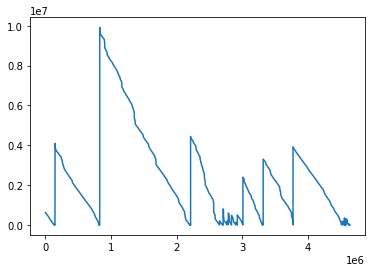

In [ ]:
f1_data['Flowcool_Pressure_dropped_below_limit'].plot()

In [ ]:
train = f1data.iloc[3260000:3307059] 

train_drop = train.drop('Flowcool_Pressure_dropped_below_limit', axis=1)

In [ ]:
test = f1data.iloc[4492500:4513678]

In [ ]:
validation2= f1data.iloc[2187500:2198000]

In [ ]:
print(validation2.shape)

(10500, 13)


In [ ]:
print(train.shape, test.shape)

(47059, 13) (21178, 13)


<AxesSubplot:>

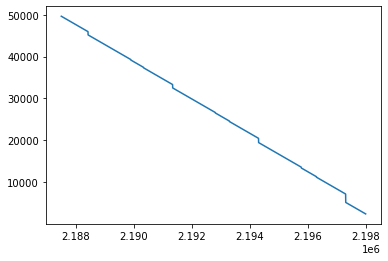

In [ ]:
validation2['Flowcool_Pressure_dropped_below_limit'].plot()

<AxesSubplot:>

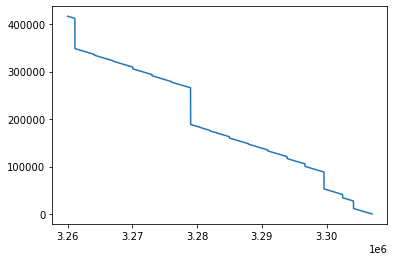

In [ ]:
train['Flowcool_Pressure_dropped_below_limit'].plot()

<AxesSubplot:>

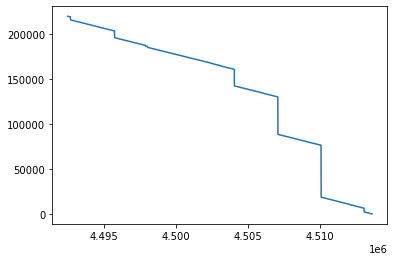

In [ ]:
test['Flowcool_Pressure_dropped_below_limit'].plot()

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(train)

sstrain = scaler.transform(train)
sstest = scaler.transform(test)
ssval = scaler.transform(validation2)

In [ ]:
scaler_drop = StandardScaler()
scaler_drop = scaler_drop.fit(train_drop)

sstrain_drop = scaler_drop.transform(train_drop)

In [ ]:
trainX, trainy = sstrain[:,:-1],sstrain[:,-1]
testX, testy =  sstest[:,:-1],sstest[:,-1]
valX, valy = ssval[:,:-1],ssval[:,-1]

In [ ]:
# Reshape
train_X = trainX.reshape(trainX.shape[0],1,trainX.shape[1])
test_X = testX.reshape(testX.shape[0],1,testX.shape[1])
val_X = valX.reshape(valX.shape[0],1,valX.shape[1])

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
model = Sequential()
model.add(LSTM(50, activation ='relu', input_shape=(1,12), return_sequences=True))
model.add(LSTM(50, activation ='relu', return_sequences = False))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss ='mse', metrics=['RootMeanSquaredError'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 50)             12600     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 32,851
Trainable params: 32,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_X, trainy, epochs=15, batch_size =16, validation_data =(val_X, valy), verbose =1, shuffle=False)

Epoch 1/15
2942/2942 [==============================] - 14s 4ms/step - loss: 0.3799 - root_mean_squared_error: 0.5231 - val_loss: 3719.7493 - val_root_mean_squared_error: 60.9897
Epoch 2/15
2942/2942 [==============================] - 11s 4ms/step - loss: 0.1448 - root_mean_squared_error: 0.3131 - val_loss: 23268.5938 - val_root_mean_squared_error: 152.5405
Epoch 3/15
2942/2942 [==============================] - 10s 3ms/step - loss: 0.0370 - root_mean_squared_error: 0.1681 - val_loss: 3592.8899 - val_root_mean_squared_error: 59.9407
Epoch 4/15
2942/2942 [==============================] - 10s 3ms/step - loss: 0.0167 - root_mean_squared_error: 0.1152 - val_loss: 140.0260 - val_root_mean_squared_error: 11.8333
Epoch 5/15
2942/2942 [==============================] - 10s 3ms/step - loss: 0.0271 - root_mean_squared_error: 0.1379 - val_loss: 2.4917 - val_root_mean_squared_error: 1.5785
Epoch 6/15
2942/2942 [==============================] - 10s 3ms/step - loss: 0.0226 - root_mean_squared_erro

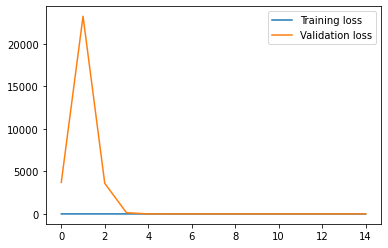

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [ ]:
score, acc = model.evaluate(test_X, testy)
print('score %.2f'%score)
print('score %.2f'%acc)

662/662 [==============================] - 1s 2ms/step - loss: 1185.2885 - root_mean_squared_error: 34.4280
score 1185.29
score 34.43


In [ ]:
model1 = Sequential()
model1.add(LSTM(50, activation ='relu', input_shape=(1,12), return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(50, activation ='relu', return_sequences = False))
model1.add(Dropout(0.2))
model1.add(Dense(1))
model1.compile(optimizer = 'adam', loss ='mse', metrics=['MeanSquaredError'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1, 50)             12600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 32,851
Trainable params: 32,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(train_X, trainy, epochs=20, batch_size =16, validation_data =(val_X, valy), verbose =1, shuffle=False)

Epoch 1/20
2942/2942 [==============================] - 15s 4ms/step - loss: 0.4105 - mean_squared_error: 0.4105 - val_loss: 87.4753 - val_mean_squared_error: 87.4753
Epoch 2/20
2942/2942 [==============================] - 11s 4ms/step - loss: 0.2656 - mean_squared_error: 0.2656 - val_loss: 826.0690 - val_mean_squared_error: 826.0690
Epoch 3/20
2942/2942 [==============================] - 12s 4ms/step - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 1.6662 - val_mean_squared_error: 1.6662
Epoch 4/20
2942/2942 [==============================] - 13s 5ms/step - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 1.5098 - val_mean_squared_error: 1.5098
Epoch 5/20
2942/2942 [==============================] - 14s 5ms/step - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 1.3429 - val_mean_squared_error: 1.3429
Epoch 6/20
2942/2942 [==============================] - 11s 4ms/step - loss: 0.0885 - mean_squared_error: 0.0885 - val_loss: 1.1973 - val_mean_squared_error: 1.1973
Epoc

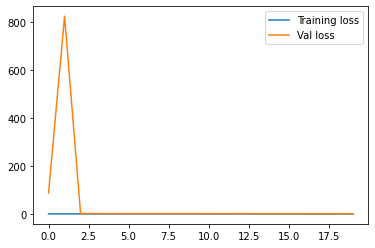

In [ ]:
plt.plot(history1.history['loss'], label='Training loss')
plt.plot(history1.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

In [ ]:
score, acc, = model1.evaluate(test_X, testy)
print('score %.2f'%score)
print('score %.2f'%acc)

662/662 [==============================] - 1s 2ms/step - loss: 0.3901 - mean_squared_error: 0.3901
score 0.39
score 0.39


#### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)

In [ ]:
rfr.fit(trainX, trainy)

RandomForestRegressor(random_state=42)

In [ ]:
kr_rfr = rfr.predict(testX)

In [ ]:
from sklearn.metrics import mean_squared_error

rfr_mse = mean_squared_error(testy, kr_rfr)
rfr_rmse = np.sqrt(rfr_mse)

print(rfr_mse)
print(rfr_rmse)

1.6173207554368163
1.2717392639361327


In [ ]:
#test_score = rfr.score(testX, testy)
#print(test_score)

In [ ]:
result = permutation_importance(rfr, testX, testy, random_state=42)

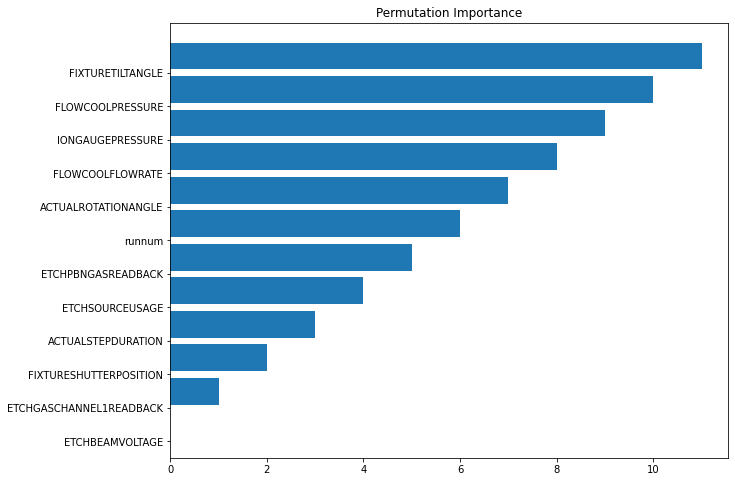

In [ ]:
pp = result.importances_mean.argsort()

sort_pp = np.argsort(pp)

pos = np.arange(sort_pp.shape[0])+0.5
y_ticks = np.arange(0,len(train_drop.columns))

plt.figure(figsize=(10,8))
plt.barh(pos, pp[sort_pp])
plt.yticks(y_ticks, train_drop.columns[sort_pp])
plt.title('Permutation Importance')
plt.show()

#### Linear Regression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(trainX, trainy)

LinearRegression()

In [ ]:
kr_lr = lr.predict(testX)

In [ ]:
lr_mse = mean_squared_error(testy, kr_lr)
lr_rmse = np.sqrt(lr_mse)

print(lr_mse)
print(lr_rmse)

4335.845155202646
65.84713475317393


#### Ridge

In [ ]:
ridge = Ridge()

In [ ]:
ridge.fit(trainX, trainy)

Ridge()

In [ ]:
kr_ridge = ridge.predict(testX)

In [ ]:
ridge_mse = mean_squared_error(testy, kr_ridge)
ridge_rmse = np.sqrt(ridge_mse)

print(ridge_mse)
print(ridge_rmse)

4328.827852339562
65.79382837576456


#### Lasso

In [ ]:
lasso = Lasso()

In [ ]:
lasso.fit(trainX, trainy)

Lasso()

In [ ]:
kr_lasso = lasso.predict(testX)

In [ ]:
lasso_mse = mean_squared_error(testy, kr_lasso)
lasso_rmse = np.sqrt(lasso_mse)

print(lasso_mse)
print(lasso_rmse)

0.6419926796141524
0.8012444568383312


#### Cross Validation

Cross Validation for the all the models except LSTM which has the validation built into the model.

In [ ]:
rfr_valscore = cross_val_score(rfr, valX, valy, scoring='neg_mean_squared_error', cv=5)

rfr_rmse_valscore = np.sqrt(-rfr_valscore)

print('Scores', rfr_rmse_valscore)
print('Mean Score', rfr_rmse_valscore.mean())
print('Standard Deviation', rfr_rmse_valscore.std())

Scores [0.04836997 0.01672447 0.02248315 0.02165954 0.0553563 ]
Mean Score 0.03291868620482503
Standard Deviation 0.015748713002789714


In [ ]:
lr_valscore = cross_val_score(lr, valX, valy, scoring='neg_mean_squared_error', cv=5)

lr_rmse_valscore = np.sqrt(-lr_valscore)

print('Scores', lr_rmse_valscore)
print('Mean Score', lr_rmse_valscore.mean())
print('Standard Deviation', lr_rmse_valscore.std())

Scores [0.0056053  0.00208547 0.00351925 0.00360065 0.00799929]
Mean Score 0.004561991341102838
Standard Deviation 0.0020517363410783715


In [ ]:
ridge_valscore = cross_val_score(ridge, valX, valy, scoring='neg_mean_squared_error', cv=5)

ridge_rmse_valscore = np.sqrt(-ridge_valscore)

print('Scores', ridge_rmse_valscore)
print('Mean Score', ridge_rmse_valscore.mean())
print('Standard Deviation', ridge_rmse_valscore.std())

Scores [0.00518569 0.00188909 0.00340263 0.00307966 0.00912538]
Mean Score 0.0045364868712255675
Standard Deviation 0.002525710942021522


In [ ]:
lasso_valscore = cross_val_score(lasso, valX, valy, scoring='neg_mean_squared_error', cv=5)

lasso_rmse_valscore = np.sqrt(-lasso_valscore)

print('Scores', lasso_rmse_valscore)
print('Mean Score', lasso_rmse_valscore.mean())
print('Standard Deviation', lasso_rmse_valscore.std())

Scores [0.20823962 0.10784714 0.02260986 0.10597517 0.21264608]
Mean Score 0.13146357487955496
Standard Deviation 0.07147263184194087


#### Reference

- [181 - LSTM](https://www.youtube.com/watch?v=tepxdcepTbY0)

- machinelearningmastery.com-multivariate time series forecasting LSTM 